In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import xgboost
from xgboost import XGBClassifier

import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import random

In [83]:
bigcity = pd.read_csv("BigCitiesHealth.csv", index_col = 0)

C:\Users\user\AppData\Local\Temp\ipykernel_21128\2053427538.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  bigcity = pd.read_csv("BigCitiesHealth.csv", index_col = 0)


In [84]:
type(bigcity)

pandas.core.frame.DataFrame

In [85]:
bigcity

,metric_cat_label,metric_subcat_label,metric_item_label_subtitle,metric_cat_item_yaxis_label,metric_source_desc_label_fn,metric_source_desc_label_url_fn,geo_label_city,geo_label_state,geo_label_citystate,geo_fips_code,...,value_90_ci_low,value_90_ci_high,geo_strata_region,geo_strata_poverty,geo_strata_Population,geo_strata_PopDensity,geo_strata_Segregation,strata_race_label,strata_sex_label,strata_race_sex_label
metric_item_label,,,,,,,,,,,,,,,,,,,,,
All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Cleveland,OH,"Cleveland, OH",3916000.0,...,NaN,NaN,Midwest,Poorest cities (18%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Black,Female,Black Female
All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Oakland,CA,"Oakland, CA",653000.0,...,NaN,NaN,West,Less poor cities (<18% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),Hispanic,Male,Hispanic Male
All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,San Francisco,CA,"San Francisco, CA",667000.0,...,NaN,NaN,West,Less poor cities (<18% poor),Smaller (<1.3 million),Highest pop. density (>10k per sq mi),Less Segregated (<50%),All,Female,NaN
All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Long Beach,CA,"Long Beach, CA",643000.0,...,NaN,NaN,West,Less poor cities (<18% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Hispanic,Female,Hispanic Female
All Cancer Deaths,Chronic Health Conditions,Cancer,"Deaths from all types of cancer (per 100,000 p...","Per 100,000","National Vital Statistics System (NVSS), Cente...",https://www.cdc.gov/nchs/nvss/index.htm,Cleveland,OH,"Cleveland, OH",3916000.0,...,NaN,NaN,Midwest,Poorest cities (18%+ poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Highly Segregated (50%+),Black,Male,Black Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Racial Segregation, White and Hispanic",Social and Economic Factors,Racial Segregation Indices,Residential segregation of white non-Hispanic ...,Lower is better,"American Community Survey, U.S. Census Bureau",https://www.census.gov/programs-surveys/acs,Chicago,IL,"Chicago, IL",1714000.0,...,NaN,NaN,Midwest,Less poor cities (<18% poor),Largest (>1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),All,Both,NaN
"Racial Segregation, White and Hispanic",Social and Economic Factors,Racial Segregation Indices,Residential segregation of white non-Hispanic ...,Lower is better,"American Community Survey, U.S. Census Bureau",https://www.census.gov/programs-surveys/acs,Charlotte,NC,"Charlotte, NC",3712000.0,...,NaN,NaN,South,Less poor cities (<18% poor),Smaller (<1.3 million),Lower pop. density (<10k per sq mi),Less Segregated (<50%),All,Both,NaN
"Racial Segregation, White and Hispanic",Social and Economic Factors,Racial Segregation Indices,Residential segregation of white non-Hispanic ...,Lower is better,"American Community Survey, U.S. Census Bureau",https://www.census.gov/programs-surveys/acs,Boston,MA,"Boston, MA",2507000.0,...,NaN,NaN,Northeast,Less poor cities (<18% poor),Smaller (<1.3 million),Highest pop. density (>10k per sq mi),Highly Segregated (50%+),All,Both,NaN


In [86]:
bigcity.count()

metric_cat_label                   189979
metric_subcat_label                189979
metric_item_label_subtitle         189979
metric_cat_item_yaxis_label        189979
metric_source_desc_label_fn        189979
metric_source_desc_label_url_fn    189979
geo_label_city                     189979
geo_label_state                    188667
geo_label_citystate                189979
geo_fips_code                      188667
value                              189979
date_label                         189979
geo_label_proxy_or_real            189979
geo_label_proxy_footnote            16804
geo_fips_desc                      189979
date_label_proxy_or_real           189979
date_label_proxy_footnote           54759
value_ci_flag_yesno                189979
value_95_ci_low                    118670
value_95_ci_high                   118682
value_90_ci_low                         0
value_90_ci_high                        0
geo_strata_region                  188667
geo_strata_poverty                

In [87]:
bigcity['metric_cat_label'].value_counts()

metric_cat_label
Chronic Health Conditions          47473
Social and Economic Factors        28240
Violence and Injury                24655
Mental Health and Substance Use    20714
Life Expectancy and Deaths         18073
Infectious Diseases                17008
Climate and Built Environment      11162
Maternal and Child Health           8659
Access to Health Services           6886
Demographics                        5625
Poisoning                           1484
Name: count, dtype: int64

In [88]:
bigcity['metric_subcat_label'].value_counts()

metric_subcat_label
Deaths                          33959
Cancer                          20290
Substance Use                   12924
Cardiovascular Disease          12801
Income                           9165
Respiratory Infection            8855
Sexually Transmitted Disease     8153
Births                           7966
Mental Health                    7790
Diabetes and Obesity             6996
Housing                          6742
Income-related                   6314
Transportation                   5264
Crime Incidents                  5207
Life Expectancy at Birth         5004
Health Insurance                 4220
Population                       3609
Education                        3211
Physical Activity                3122
Disability                       2743
Active Transportation            2686
Racial Segregation Indices       1872
Heat and Disasters               1846
Language and Nativity            1548
Lead Poisoning                   1484
School Violence               

In [89]:
bigcity['metric_cat_label'].value_counts()

metric_cat_label
Chronic Health Conditions          47473
Social and Economic Factors        28240
Violence and Injury                24655
Mental Health and Substance Use    20714
Life Expectancy and Deaths         18073
Infectious Diseases                17008
Climate and Built Environment      11162
Maternal and Child Health           8659
Access to Health Services           6886
Demographics                        5625
Poisoning                           1484
Name: count, dtype: int64

In [90]:
bigcity['metric_item_label_subtitle'].value_counts()

metric_item_label_subtitle
Years of potential life lost before age 75 (per 100,000 population, age-adjusted)                       6825
Deaths due to unintentional injury, suicide and homicide (per 100,000 population, age-adjusted)         6405
Deaths from all causes (per 100,000 population, age-adjusted)                                           6244
Deaths from all types of cancer (per 100,000 population, age-adjusted)                                  6233
Deaths from heart and blood vessel disorders including stroke (per 100,000 population, age-adjusted)    6195
                                                                                                        ... 
Number people experiencing homelessness, per 100,000 residents                                           266
Ratio of vacant rental housing unit per persons who are unhoused (sheltered and unsheltered)             266
Percent of children aged <18 among persons who are unhoused (sheltered and unsheltered)              

In [91]:
bigcity['metric_cat_item_yaxis_label']

metric_item_label
All Cancer Deaths                             Per 100,000
All Cancer Deaths                             Per 100,000
All Cancer Deaths                             Per 100,000
All Cancer Deaths                             Per 100,000
All Cancer Deaths                             Per 100,000
                                               ...       
Racial Segregation, White and Hispanic    Lower is better
Racial Segregation, White and Hispanic    Lower is better
Racial Segregation, White and Hispanic    Lower is better
Racial Segregation, White and Hispanic    Lower is better
Racial Segregation, White and Hispanic    Lower is better
Name: metric_cat_item_yaxis_label, Length: 189979, dtype: object

In [92]:
bigcity['metric_source_desc_label_fn'].value_counts()

metric_source_desc_label_fn
National Vital Statistics System (NVSS), Centers for Disease Control and Prevention                                                                                              112904
American Community Survey, U.S. Census Bureau                                                                                                                                     48458
Youth Risk Behavior Surveillance System, Centers for Disease Control and Prevention                                                                                               10065
National Center for HIV/AIDS, Viral Hepatitis, STD, and TB Prevention AtlasPlus, Centers for Disease Control and Prevention                                                        5240
Centers for Disease Control and Prevention's Population Level Analysis and Community Estimates (CDC-PLACES) based primarily on the Behavioral Risk Factor Surveillance System      3744
Centers for Medicare and Medicaid Services, U.S. Dep

In [93]:
bigcity['value'].value_counts()

value
0.000000      245
51.000000      93
36.000000      92
33.000000      92
34.000000      90
             ... 
857.282728      1
472.296382      1
820.912759      1
761.238907      1
42.815619       1
Name: count, Length: 128785, dtype: int64

In [94]:
bigcity['geo_label_proxy_or_real'].value_counts()

geo_label_proxy_or_real
real     163541
proxy     26438
Name: count, dtype: int64

In [95]:
bigcity['metric_cat_label']

metric_item_label
All Cancer Deaths                           Chronic Health Conditions
All Cancer Deaths                           Chronic Health Conditions
All Cancer Deaths                           Chronic Health Conditions
All Cancer Deaths                           Chronic Health Conditions
All Cancer Deaths                           Chronic Health Conditions
                                                     ...             
Racial Segregation, White and Hispanic    Social and Economic Factors
Racial Segregation, White and Hispanic    Social and Economic Factors
Racial Segregation, White and Hispanic    Social and Economic Factors
Racial Segregation, White and Hispanic    Social and Economic Factors
Racial Segregation, White and Hispanic    Social and Economic Factors
Name: metric_cat_label, Length: 189979, dtype: object

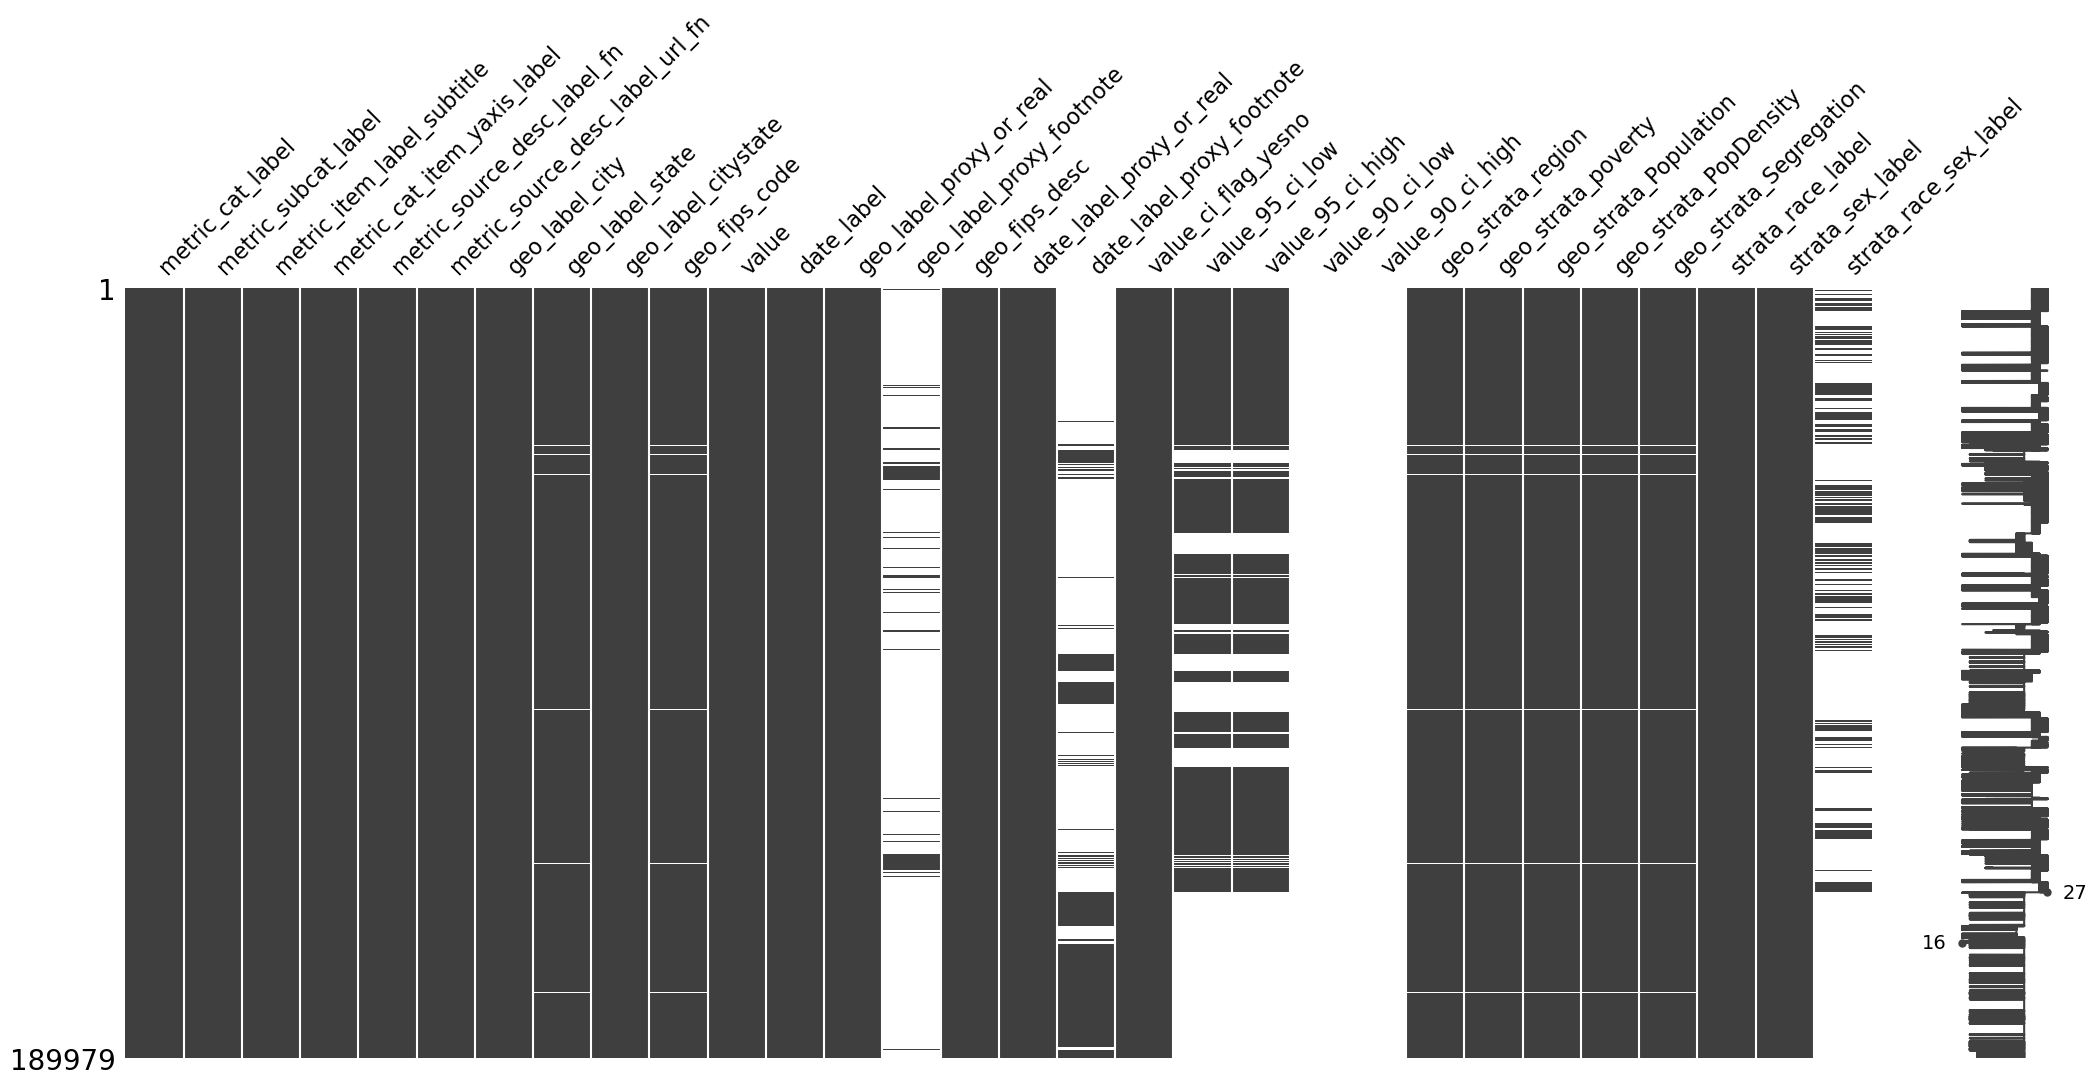

In [96]:
msno.matrix(bigcity);

In [97]:
categories = [
    'Chronic Health Conditions',
    'Social and Economic Factors',
    'Violence and Injury',
    'Mental Health and Substance Use',
    'Life Expectancy and Deaths',
    'Infectious Diseases',
    'Climate and Built Environment',
    'Maternal and Child Health',
    'Access to Health Services',
    'Demographics',
    'Poisoning'
]

In [81]:
for category in categories:
    df[category] = df['metric_cat_label'].apply(lambda x: int(x.split()[-1]) if category in x else 0)

KeyError: 'metric_cat_label'